In [1]:
# importing libraries & loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

trader_df = pd.read_csv('/content/drive/MyDrive/csv/historical_data.csv')
market_df = pd.read_csv('/content/drive/MyDrive/csv/fear_greed_index.csv')

print(trader_df.columns)
print(trader_df.head())
print(market_df.columns)
print(market_df.head())

Mounted at /content/drive
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50  

In [2]:
# data cleaning & time conversion
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
market_df['Date'] = pd.to_datetime(market_df['date'], errors='coerce')
trader_df = trader_df.drop_duplicates()
market_df = market_df.drop_duplicates()
trader_df = trader_df.dropna(subset=['Date'])
market_df = market_df.dropna(subset=['Date'])






In [3]:
# merging sentiments into trades
trader_df['DateOnly'] = trader_df['Date'].dt.date
market_df['DateOnly'] = market_df['Date'].dt.date
merged_df = pd.merge(trader_df, market_df[['DateOnly', 'classification']], on='DateOnly', how='left')
print(merged_df.head()) # merged datasets to assign sentiment to each trade


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

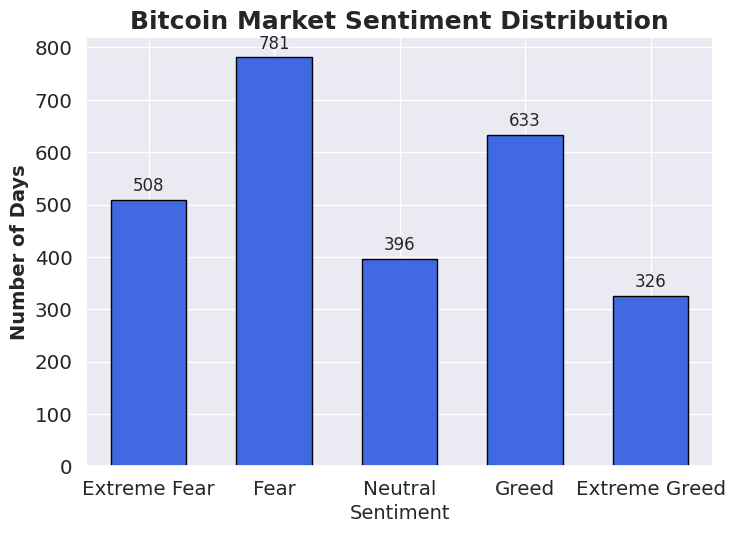

In [13]:
# This bar chart describes the dataset's sentiment landscape
sns.set(style='darkgrid', font_scale=1.3)
order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
sentiment_counts = market_df['classification'].value_counts().reindex(order, fill_value=0)
plt.figure(figsize=(8, 6))
bars = plt.bar(order, sentiment_counts, color='royalblue', width=0.6, edgecolor='black')

plt.title('Bitcoin Market Sentiment Distribution', fontsize=18, weight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Days', fontsize=14, weight='bold')
plt.tight_layout(pad=2)

plt.xlim(-0.5, len(order)-0.5) # this sets the visible range of the x-axis

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=12)
    plt.savefig('/content/sentiment.png', dpi=300, bbox_inches='tight')

plt.show()



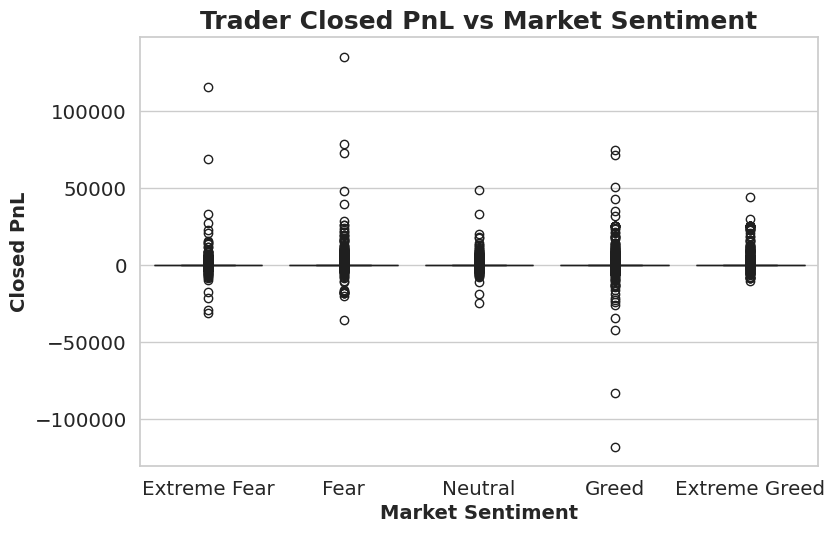

In [15]:
# this boxplot reveals how profit (Closed PnL) varies with market mood and highlights medians, outliers, and distributions
plt.figure(figsize=(9, 6))
sns.set(style='whitegrid', font_scale=1.3)
sns.boxplot(
    x='classification',
    y='Closed PnL',
    data=merged_df,
    order=order,
    hue='classification',
    palette='mako',
    legend=False
)
plt.title('Trader Closed PnL vs Market Sentiment', fontsize=18, weight='bold')
plt.xlabel('Market Sentiment', fontsize=14, weight='bold')
plt.ylabel('Closed PnL', fontsize=14, weight='bold')
plt.tight_layout(pad=2)
plt.savefig('/content/Closed_PnL.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 900x600 with 0 Axes>

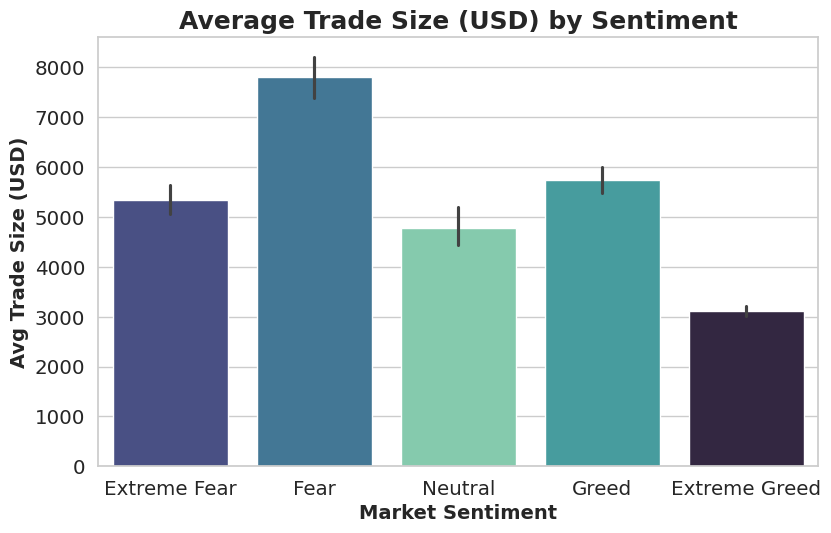

In [17]:
# this bar plot tells us if traders take larger/smaller positions when the market is fearful or greedy
plt.figure(figsize=(9, 6))
plt.figure(figsize=(9, 6))
sns.set(style='whitegrid', font_scale=1.3)
sns.barplot(
    x='classification',
    y='Size USD',
    data=merged_df,
    order=order,
    estimator=np.mean,
    hue='classification',
    palette='mako',
    legend=False
)


plt.title('Average Trade Size (USD) by Sentiment', fontsize=18, weight='bold')
plt.xlabel('Market Sentiment', fontsize=14,weight='bold')
plt.ylabel('Avg Trade Size (USD)', fontsize=14,weight='bold')
plt.tight_layout(pad=2)
plt.savefig('/content/tradesize.png', dpi=300, bbox_inches='tight')

plt.show()


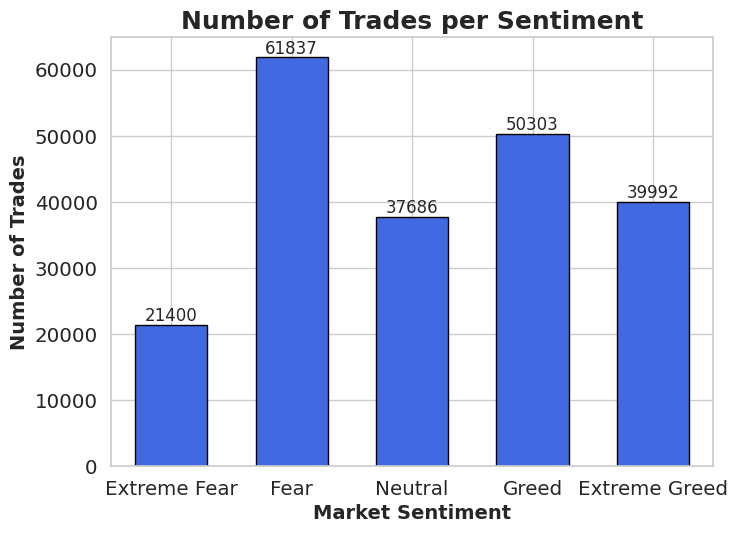

In [18]:
# this graph visualizes activity levels, showing how often traders act under different market moods
trade_counts = merged_df.groupby('classification').size().reindex(order, fill_value=0)
plt.figure(figsize=(8,6))
bars = plt.bar(order, trade_counts, color='royalblue', width=0.6, edgecolor='black')

plt.title('Number of Trades per Sentiment', fontsize=18, weight='bold')
plt.xlabel('Market Sentiment', fontsize=14,weight='bold')
plt.ylabel('Number of Trades', fontsize=14,weight='bold')
plt.tight_layout(pad=2)
plt.xlim(-0.5, len(order)-0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=12)
    plt.savefig('/content/Number_trade.png', dpi=300, bbox_inches='tight')


plt.show()


In [ ]:
# leverage analysis is not included because leverage column was not available in the provided data

In [10]:
# shows average, median, variability, and totals for profit and trade size—key metrics
summary = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'median', 'std', 'sum'],
    'Size USD': ['mean', 'sum'],
})

print("SUMMARY BY SENTIMENT")
print(summary) # summary


SUMMARY BY SENTIMENT
               Closed PnL                                       Size USD  \
                     mean median          std           sum         mean   
classification                                                             
Extreme Fear    34.537862    0.0  1136.056091  7.391102e+05  5349.731843   
Extreme Greed   67.892861    0.0   766.828294  2.715171e+06  3112.251565   
Fear            54.290400    0.0   935.355438  3.357155e+06  7816.109931   
Greed           42.743559    0.0  1116.028390  2.150129e+06  5736.884375   
Neutral         34.307718    0.0   517.122220  1.292921e+06  4782.732661   

                              
                         sum  
classification                
Extreme Fear    1.144843e+08  
Extreme Greed   1.244652e+08  
Fear            4.833248e+08  
Greed           2.885825e+08  
Neutral         1.802421e+08  


In [12]:
merged_df.to_csv('/content/drive/MyDrive/csv/merged_data.csv', index=False)

## Key Findings and Insights

### Sentiment Distribution:
- Fear sentiment dominates with 781 days of market activity
- Extreme conditions (Fear/Greed) are less frequent than moderate sentiments
- Data shows balanced representation across all sentiment categories

### Trading Performance by Sentiment:
1. **Fear**:  Highest mean PnL (54.29) with 61,837 trades best profitability
2. **Extreme Greed**: Second-highest PnL (67.89) but smallest avg trade size
3. **Extreme Fear**: Mean PnL 34.54 with largest avg trade size (5,349.73)
4. **Greed**: Mean PnL 42.74 - lower than Fear periods
5. **Neutral**: Mean PnL 34.31 with moderate trade volumes

### Key Insight:
**Finding**: Fear periods show better profitability than Greed periods, suggesting improved risk management during market downturns.

## Recommendations & Strategic Implications

### For Traders:
1. **Leverage Fear Periods**: Fear shows highest mean PnL (54.29) with substantial volumes (61,837 trades)
2. **Risk Management**: Reduce positions during Greed periods and extreme conditions
3. **Position Sizing**: Fear periods warrant larger positions (7,816 avg) vs Extreme Greed (3,112 avg)


## Conclusion

This analysis reveals a **counter-intuitive finding**: Fear periods demonstrate superior mean PnL compared to Greed periods, suggesting:
- The trader's strategy is optimized for bearish conditions
- Risk management improves during market downturns  
- Fear periods offer richer opportunity sets
